In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from keras.layers.core import Dropout
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# PART I : LAOD AND DESCRIPTE DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## load training data
train=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
## load testing data
test=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
## Draw the histogram plot of the features

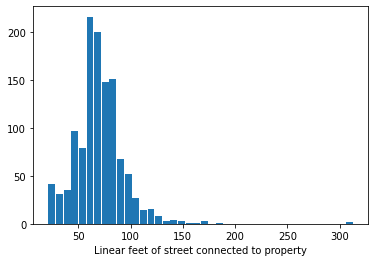

In [ ]:
## Histgram of feature LotFrontAge
plt.hist(train['LotFrontage'], bins=40, rwidth=0.9)
plt.xlabel('Linear feet of street connected to property')
plt.show()

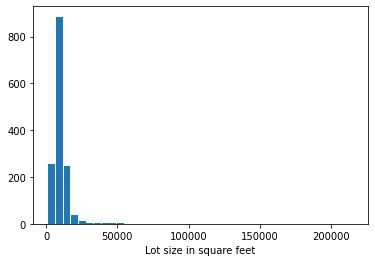

In [ ]:
## Histgram of feature LotArea
plt.hist(train['LotArea'], bins=40, rwidth=0.9)
plt.xlabel('Lot size in square feet')
plt.show()

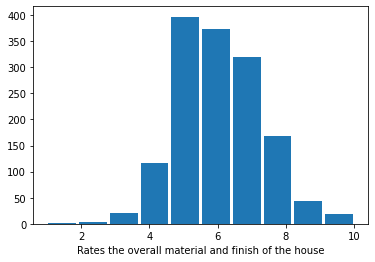

In [ ]:
## Histgram of feature OverallQuall
plt.hist(train['OverallQual'], bins=10, rwidth=0.9)
plt.xlabel('Rates the overall material and finish of the house')
plt.show()

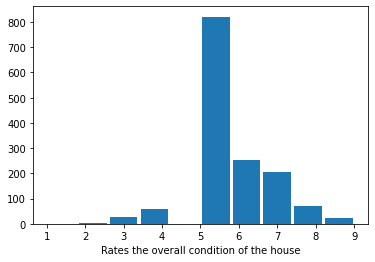

In [ ]:
## Histgram of feature OverallCond
plt.hist(train['OverallCond'], bins=10, rwidth=0.9)
plt.xlabel('Rates the overall condition of the house')
plt.show()

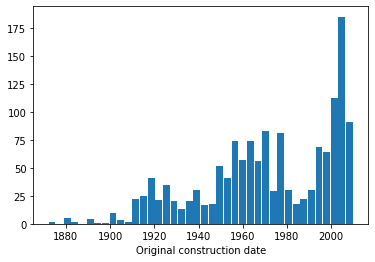

In [ ]:
## Histgram of feature YearBuilt
plt.hist(train['YearBuilt'], bins=40, rwidth=0.9)
plt.xlabel('Original construction date')
plt.show()

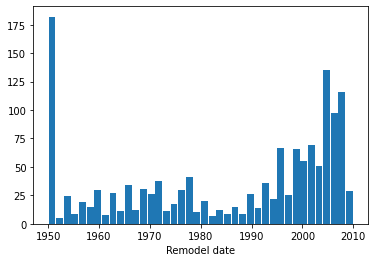

In [ ]:
## Histgram of feature YearRemodAdd
plt.hist(train['YearRemodAdd'], bins=40, rwidth=0.9)
plt.xlabel('Remodel date')
plt.show()

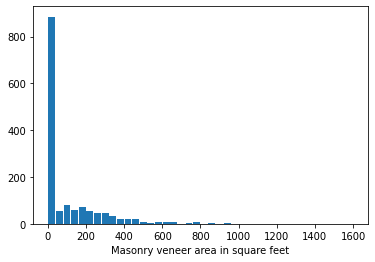

In [ ]:
## Histgram of feature MasVnrArea
plt.hist(train['MasVnrArea'], bins=40, rwidth=0.9)
plt.xlabel('Masonry veneer area in square feet')
plt.show()

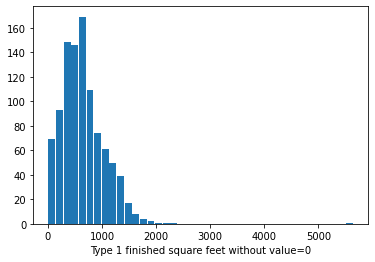

In [ ]:
## Histgram of feature BsmtFinSF1 without feature=0
new_BsmtFinSF1=[]
BsmtFinSF1=train['BsmtFinSF1']
for i in range(0,len(BsmtFinSF1)):
    if BsmtFinSF1[i] !=0:
        new_BsmtFinSF1.append(BsmtFinSF1[i])
plt.hist(new_BsmtFinSF1, bins=40, rwidth=0.9)
plt.xlabel('Type 1 finished square feet without value=0')
plt.show()

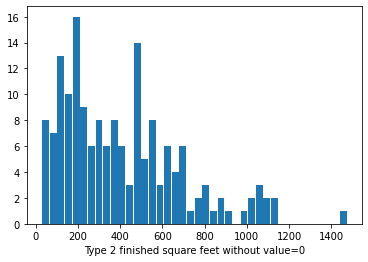

In [ ]:
## Histgram of feature BsmtFinSF2 without feature=0
new_BsmtFinSF2=[]
BsmtFinSF2=train['BsmtFinSF2']
for i in range(0,len(BsmtFinSF2)):
    if BsmtFinSF2[i] !=0:
        new_BsmtFinSF2.append(BsmtFinSF2[i])
plt.hist(new_BsmtFinSF2, bins=40, rwidth=0.9)
plt.xlabel('Type 2 finished square feet without value=0')
plt.show()

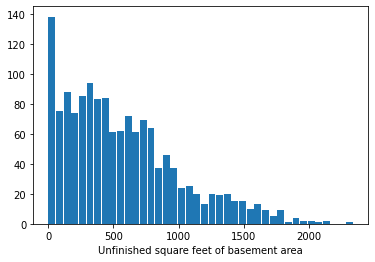

In [ ]:
## Histgram of feature BsmtUnfSF
plt.hist(train['BsmtUnfSF'], bins=40, rwidth=0.9)
plt.xlabel('Unfinished square feet of basement area')
plt.show()

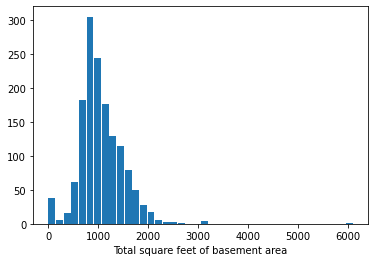

In [ ]:
## Histgram of feature TotalBsmtSF
plt.hist(train['TotalBsmtSF'], bins=40, rwidth=0.9)
plt.xlabel('Total square feet of basement area')
plt.show()

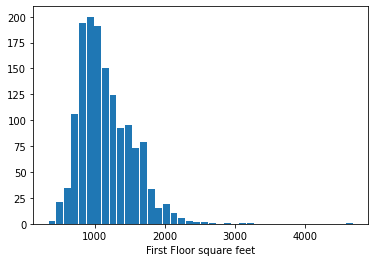

In [ ]:
## Histgram of feature 1stFlrSF
plt.hist(train['1stFlrSF'], bins=40, rwidth=0.9)
plt.xlabel('First Floor square feet')
plt.show()

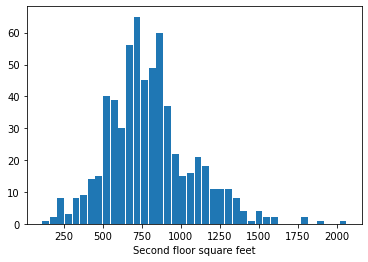

In [ ]:
## Histgram of feature 2ndFlrSF without feature=0
new_2ndFlrSF=[]
ndFlrSF=train['2ndFlrSF']
for i in range(0,len(ndFlrSF)):
    if ndFlrSF[i] !=0:
        new_2ndFlrSF.append(ndFlrSF[i])
plt.hist(new_2ndFlrSF, bins=40, rwidth=0.9)
plt.xlabel('Second floor square feet')
plt.show()

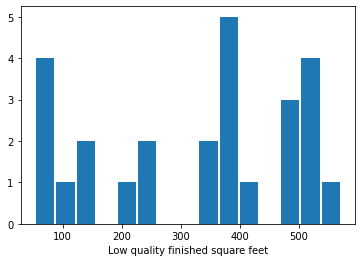

In [ ]:
## Histgram of feature LowQualFinSF without feature=0
new_LowQualFinSF=[]
LowQualFinSF=train['LowQualFinSF']
for i in range(0,len(LowQualFinSF)):
    if LowQualFinSF[i] !=0:
        new_LowQualFinSF.append(LowQualFinSF[i])
plt.hist(new_LowQualFinSF, bins=15, rwidth=0.9)
plt.xlabel('Low quality finished square feet')
plt.show()

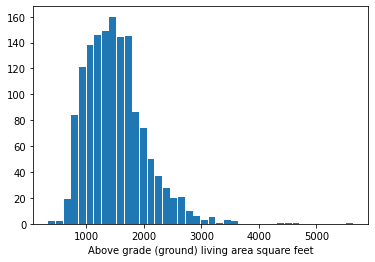

In [ ]:
## Histgram of feature GrLivArea 
plt.hist(train['GrLivArea'], bins=40, rwidth=0.9)
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

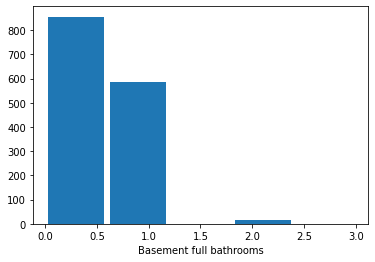

In [ ]:
## Histgram of feature BsmtFullBath
plt.hist(train['BsmtFullBath'], bins=5, rwidth=0.9)
plt.xlabel('Basement full bathrooms')
plt.show()

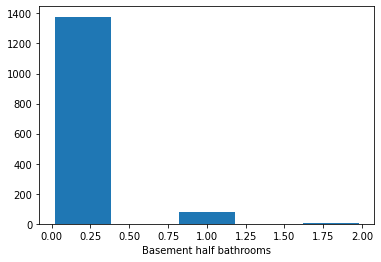

In [ ]:
## Histgram of feature BsmtHalfBath
plt.hist(train['BsmtHalfBath'], bins=5, rwidth=0.9)
plt.xlabel('Basement half bathrooms')
plt.show()

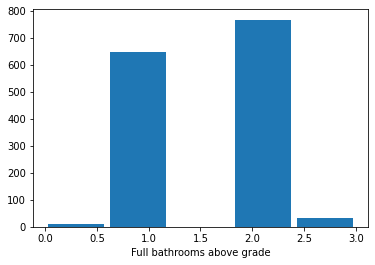

In [ ]:
## Histgram of feature FullBath
plt.hist(train['FullBath'], bins=5, rwidth=0.9)
plt.xlabel('Full bathrooms above grade')
plt.show()

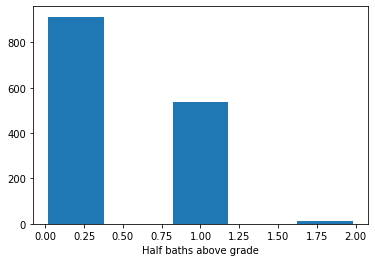

In [ ]:
## Histgram of feature HalfBath
plt.hist(train['HalfBath'], bins=5, rwidth=0.9)
plt.xlabel('Half baths above grade')
plt.show()

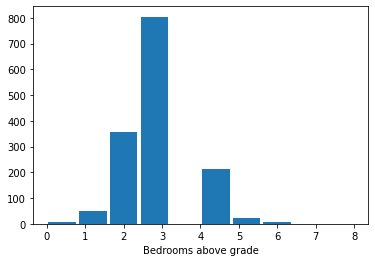

In [ ]:
## Histgram of feature BedroomAbvGr
plt.hist(train['BedroomAbvGr'], bins=10, rwidth=0.9)
plt.xlabel('Bedrooms above grade')
plt.show()

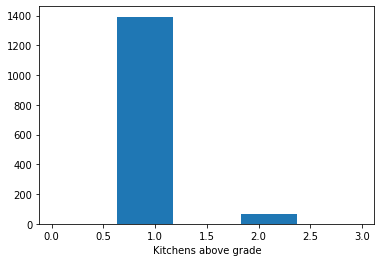

In [ ]:
## Histgram of feature KitchenAbvGr
plt.hist(train['KitchenAbvGr'], bins=5, rwidth=0.9)
plt.xlabel('Kitchens above grade')
plt.show()

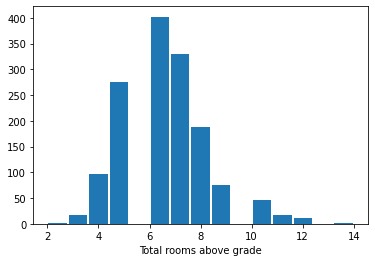

In [ ]:
## Histgram of feature TotRmsAbvGrd
plt.hist(train['TotRmsAbvGrd'], bins=15, rwidth=0.9)
plt.xlabel('Total rooms above grade')
plt.show()

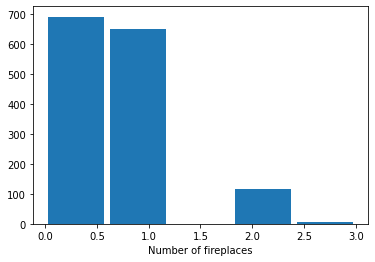

In [ ]:
## Histgram of feature Fireplaces
plt.hist(train['Fireplaces'], bins=5, rwidth=0.9)
plt.xlabel('Number of fireplaces')
plt.show()

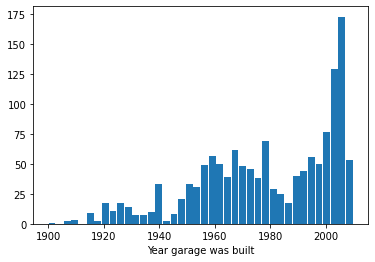

In [ ]:
## Histgram of feature GarageYrBlt
plt.hist(train['GarageYrBlt'], bins=40, rwidth=0.9)
plt.xlabel('Year garage was built')
plt.show()

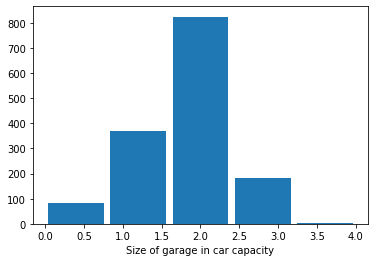

In [ ]:
## Histgram of feature GarageCars
plt.hist(train['GarageCars'], bins=5, rwidth=0.9)
plt.xlabel('Size of garage in car capacity')
plt.show()

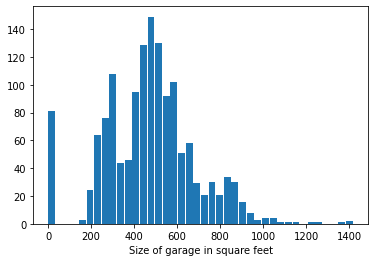

In [ ]:
## Histgram of feature GarageArea
plt.hist(train['GarageArea'], bins=40, rwidth=0.9)
plt.xlabel('Size of garage in square feet')
plt.show()

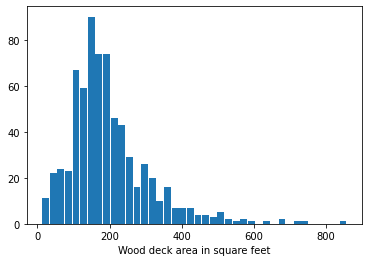

In [ ]:
## Histgram of feature WoodDeckSF without feature=0
new_WoodDeckSF=[]
WoodDeckSF=train['WoodDeckSF']
for i in range(0,len(WoodDeckSF)):
    if WoodDeckSF[i] !=0:
        new_WoodDeckSF.append(WoodDeckSF[i])
plt.hist(new_WoodDeckSF, bins=40, rwidth=0.9)
plt.xlabel('Wood deck area in square feet')
plt.show()

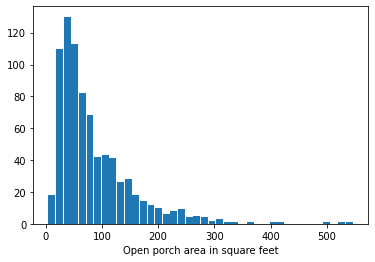

In [ ]:
## Histgram of feature OpenPorchSF without feature=0
new_OpenPorchSF=[]
OpenPorchSF=train['OpenPorchSF']
for i in range(0,len(OpenPorchSF)):
    if OpenPorchSF[i] !=0:
        new_OpenPorchSF.append(OpenPorchSF[i])
plt.hist(new_OpenPorchSF, bins=40, rwidth=0.9)
plt.xlabel('Open porch area in square feet')
plt.show()

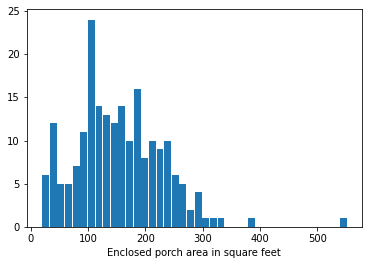

In [ ]:
## Histgram of feature EnclosedPorch without feature=0
new_EnclosedPorch=[]
EnclosedPorch=train['EnclosedPorch']
for i in range(0,len(EnclosedPorch)):
    if EnclosedPorch[i] !=0:
        new_EnclosedPorch.append(EnclosedPorch[i])
plt.hist(new_EnclosedPorch, bins=40, rwidth=0.9)
plt.xlabel('Enclosed porch area in square feet')
plt.show()

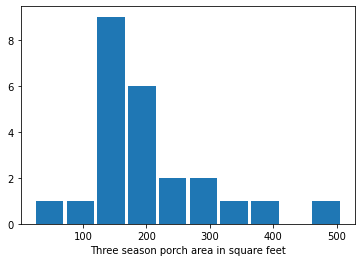

In [ ]:
## Histgram of feature 3SsnPorch without feature=0
new_3SsnPorch=[]
SsnPorch=train['3SsnPorch']
for i in range(0,len(SsnPorch)):
    if SsnPorch[i] !=0:
        new_3SsnPorch.append(SsnPorch[i])
plt.hist(new_3SsnPorch, bins=10, rwidth=0.9)
plt.xlabel('Three season porch area in square feet')
plt.show()

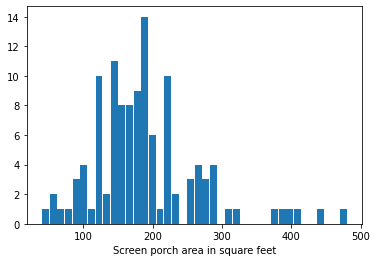

In [ ]:
## Histgram of feature ScreenPorch without feature=0
new_ScreenPorch=[]
ScreenPorch=train['ScreenPorch']
for i in range(0,len(ScreenPorch)):
    if ScreenPorch[i] !=0:
        new_ScreenPorch.append(ScreenPorch[i])
plt.hist(new_ScreenPorch, bins=40, rwidth=0.9)
plt.xlabel('Screen porch area in square feet')
plt.show()

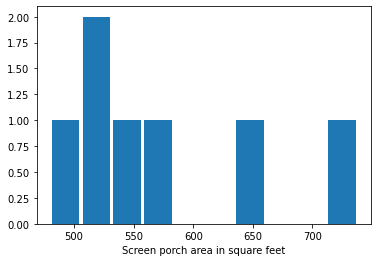

In [ ]:
## Histgram of feature PoolArea without feature=0
new_PoolArea=[]
PoolArea=train['PoolArea']
for i in range(0,len(PoolArea)):
    if PoolArea[i] !=0:
        new_PoolArea.append(PoolArea[i])
plt.hist(new_PoolArea, bins=10, rwidth=0.9)
plt.xlabel('Screen porch area in square feet')
plt.show()

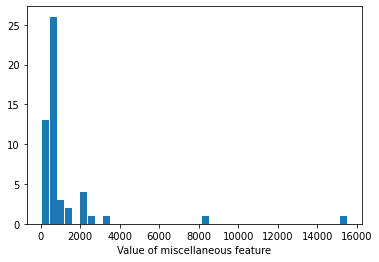

In [ ]:
## Histgram of feature MiscVal without feature=0
new_MiscVal=[]
MiscVal=train['MiscVal']
for i in range(0,len(MiscVal)):
    if MiscVal[i] !=0:
        new_MiscVal.append(MiscVal[i])
plt.hist(new_MiscVal, bins=40, rwidth=0.9)
plt.xlabel('Value of miscellaneous feature')
plt.show()

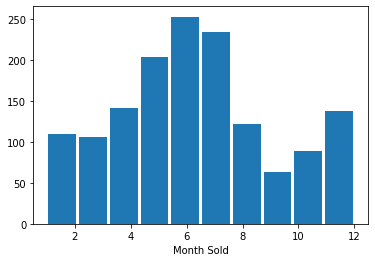

In [ ]:
## Histgram of feature MoSold
plt.hist(train['MoSold'], bins=10, rwidth=0.9)
plt.xlabel('Month Sold')
plt.show()

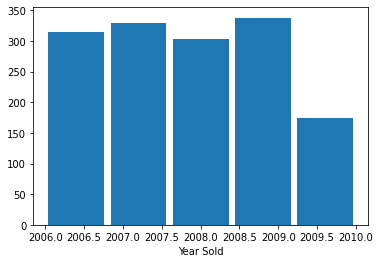

In [ ]:
## Histgram of feature YrSold
plt.hist(train['YrSold'], bins=5, rwidth=0.9)
plt.xlabel('Year Sold')
plt.show()

# PART II: DATA CLEANING

In [ ]:
# split the quantitative features and the qualitative features
quantitative = [feature for feature in train.columns if train.dtypes[feature] != 'object'] 
quantitative.remove('Id')
quantitative.remove('SalePrice')
qualitative = [feature for feature in train.columns if train.dtypes[feature] == 'object'] 


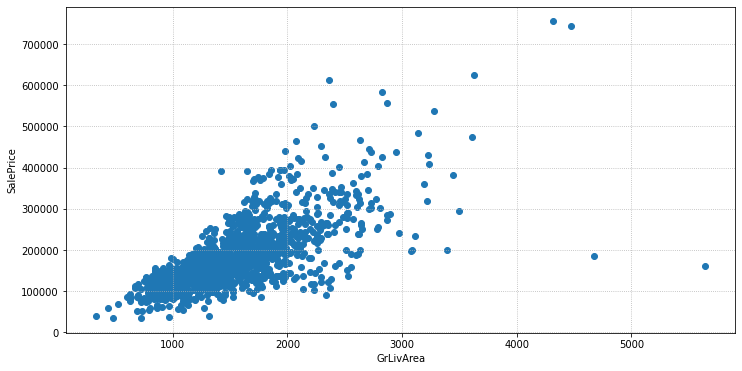

In [ ]:
## Observe the outlier

plt.figure(figsize=(12,6))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid(b=True, ls=':')
plt.show()

In [ ]:
# Delte the ouliters
train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<200000)].index, inplace=True)
# compile the train and test in order to modify the data in the same time
full = pd.concat([train, test], axis=0, ignore_index=True)
train.shape, test.shape, full.shape

((1458, 81), (1459, 80), (2917, 81))

In [ ]:
# find the missing value
missing_count = full.isnull().sum()
missing_count = missing_count[missing_count > 0].sort_values(ascending=False)
missing_rate = missing_count / len(full)

missing = pd.DataFrame()
missing['count'] = missing_count
missing['rate'] = missing_rate

In [ ]:
# dealing with the missing value of LotFrontage
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering['val']
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature)['SalePrice'].mean()
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = np.arange(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict() 
    for category, code_value in ordering.items():
        frame.loc[frame[feature]==category, feature+'_E'] = code_value
qual_encoded = []
for qual in qualitative:
    encode(train, qual)
    qual_encoded.append(qual+'_E')
  
train[quantitative+qual_encoded].corr('spearman')['LotFrontage'].sort_values(ascending=False)

full['LotAreaCut'] = pd.qcut(full['LotArea'], 10)
full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].agg(['count', 'mean', 'median'])
full['LotFrontage'] = full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# Cover the missing value using the value of LotAreaCut
full['LotFrontage'] = full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Cover the missing value with 'None' and 0 for the samples which does not have the feature (eg. some houses don't have a pool)
cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    full[col] = full[col].fillna('None')

cols2 = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols2:
    full[col] = full[col].fillna(0)

In [ ]:
# Cover the missing value with the mode of the discrete feature
cols3 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols3:
    full[col] = full[col].fillna(full[col].mode()[0])

In [ ]:
# Check whether there are till missing value
full.isnull().sum()[full.isnull().sum()>0] 

SalePrice    1459
dtype: int64

In [ ]:
full.drop('LotAreaCut', axis=1, inplace=True)

In [ ]:
full.shape

(2917, 81)

In [ ]:
# Change some numerical feature into classifier features

In [ ]:
Num_to_Str = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
for col in Num_to_Str:
    full[col] = full[col].astype(str)
full.groupby(['MSSubClass'])['SalePrice'].agg(['count', 'mean', 'median']).sort_values('median')

,count,mean,median
MSSubClass,,,
180,10,102300.000000,88500.0
30,69,95829.724638,99900.0
45,12,108591.666667,107500.0
190,30,129613.333333,128250.0
50,144,143302.972222,132000.0
90,52,133541.076923,135980.0
85,20,147810.000000,140750.0
40,4,156125.000000,142500.0
160,63,138647.380952,146000.0


In [ ]:
def map_values(df):
    df['MSSubClass'] = df['MSSubClass'].map({'180':1,
                                             '30':2, '45':2,
                                             '190':3, '50':3, '90':3, 
                                             '85':4, '40':4, '160':4, 
                                             '70':5, '20':5, '75':5, '80':5, '150':5,
                                             '120': 6, '60':6})

    df['MSZoning'] = df['MSZoning'].map({'C (all)':1, 'RM':2, 'RH':2, 'RL':3, 'FV':4})

    df['Neighborhood'] = df['Neighborhood'].map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

    df['HouseStyle'] = df['HouseStyle'].map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

    df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})

    df['ExterQual'] = df['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['ExterCond'] = df['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Foundation'] = df['Foundation'].map({'Slab':1, 'BrkTil':2, 'CBlock':2, 'Stone':2, 'Wood':3, 'PConc':4})

    df['BsmtQual'] = df['BsmtQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['BsmtCond'] = df['BsmtCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['BsmtExposure'] = df['BsmtExposure'].map({'None':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5})

    df['BsmtFinType1'] = df['BsmtFinType1'].map({'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

    df['BsmtFinType2'] = df['BsmtFinType2'].map({'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

    df['HeatingQC'] = df['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['KitchenQual'] = df['KitchenQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Functional'] = df['Functional'].map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})

    df['FireplaceQu'] = df['FireplaceQu'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['GarageFinish'] = df['GarageFinish'].map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})

    df['GarageQual'] = df['GarageQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['GarageCond'] = df['GarageCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['PavedDrive'] = df['PavedDrive'].map({'N':1, 'P':2, 'Y':3})

    df['PoolQC'] = df['PoolQC'].map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Fence'] = df['Fence'].map({'None':1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5})

map_values(full)

In [ ]:
# Change time feature into label (the built time of the house, for example)

In [ ]:
lab = LabelEncoder()
full['YearBuilt'] = lab.fit_transform(full['YearBuilt'])
full['YearRemodAdd'] = lab.fit_transform(full['YearRemodAdd'])
full['GarageYrBlt'] = lab.fit_transform(full['GarageYrBlt'])

In [ ]:
full.drop(['SalePrice', 'Id'], axis=1, inplace=True)
full_fe = full.copy()
# Log the quantitative feature which skewness larger than 1
full_numeric = full_fe.select_dtypes(exclude='object')
skew = full_numeric.apply(lambda x: x.skew())
skew_features = skew[abs(skew) >= 1].index
full_fe[skew_features] = np.log1p(full_fe[skew_features])

In [ ]:
full_fe = pd.get_dummies(full_fe)

In [ ]:
scaler = RobustScaler()
# split the train set and test set
n_train = train.shape[0]
train_X = full_fe[:n_train]
test_X = full_fe[n_train:]
train_y = train['SalePrice']
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = np.log(train_y)

<Figure size 432x288 with 0 Axes>

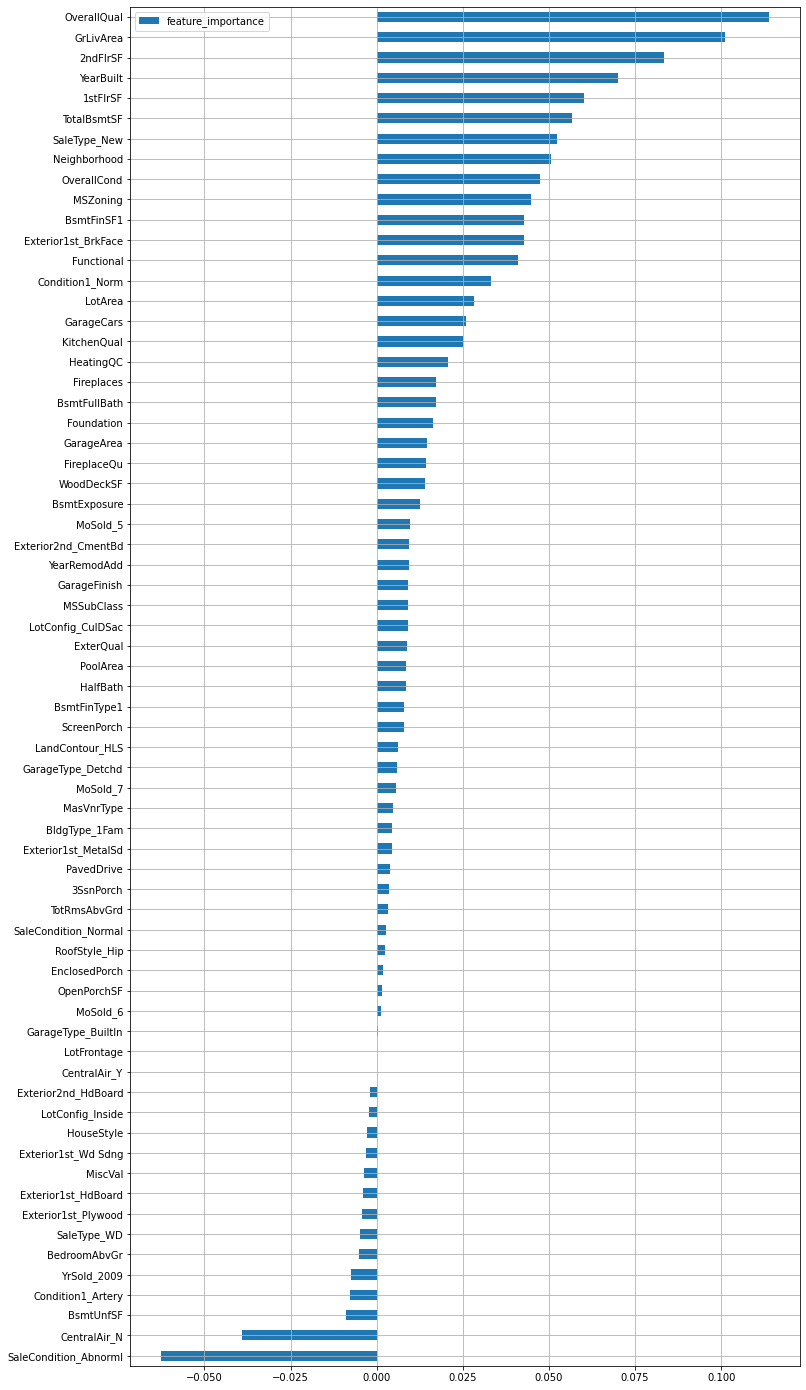

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_X, train_y)
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso_fi = pd.DataFrame({'feature_importance':lasso.coef_}, index=full_fe.columns)
lasso_fi.sort_values('feature_importance', ascending=False)
plt.figure()
lasso_fi[lasso_fi['feature_importance'] != 0].sort_values('feature_importance').plot(kind='barh', figsize=(12, 25))
plt.grid()
plt.show()

In [ ]:
# according to the result of Lasso, make compose of new features.

def add_feature(X):
    X['TotalHouse'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
    X['TotalArea'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF'] + X['GarageArea']
    X['TotalQuality'] = X['OverallQual'] + X['OverallCond']

    X['TotalHouse_OverallQual'] = X['TotalHouse'] * X['OverallQual']
    X['GrLivArea_OverallQual'] = X['GrLivArea'] * X['OverallQual']
    X['MSZoning_TotalHouse'] = X['MSZoning'] * X['TotalHouse']
    X['MSZoning_OverallQual'] = X['MSZoning'] + X['OverallQual']
    X['MSZoning_YearBuilt'] = X['MSZoning'] + X['YearBuilt']
    X['Neighborhood_TotalHouse'] = X['Neighborhood'] * X['TotalHouse']
    X['Neighborhood_OverallQual'] = X['Neighborhood'] + X['OverallQual']
    X['Neighborhood_YearBuilt'] = X['Neighborhood'] + X['YearBuilt']
    X['BsmtFinSF1_OverallQual'] = X['BsmtFinSF1'] * X['OverallQual']
    X['Functional_TotalHouse'] = X['Functional'] * X['TotalHouse']
    X['Functional_OverallQual'] = X['Functional'] + X['OverallQual']
    X['LotArea_OverallQual'] = X['LotArea'] * X['OverallQual']
    X['LotArea_TotalHouse'] = X['LotArea'] + X['TotalHouse']

    X['Bsmt'] = X['BsmtFinSF1'] + X['BsmtFinSF2'] + X['BsmtUnfSF']
    X['PorchArea'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']

    X['TotalPlace'] = X['TotalArea'] + X['PorchArea']

full_fe1 = full.copy()
 
full_fe1.shape
(2917, 79)

# add features
add_feature(full_fe1)

full_fe1.shape
(2917, 98)
# change the value
full_numeric1 = full_fe1.select_dtypes(exclude='object')
skew1 = full_numeric1.apply(lambda x: x.skew())
skew_features1 = skew1[abs(skew1) >= 1].index
full_fe1[skew_features1] = np.log1p(full_fe1[skew_features1])
# one-hot code
full_fe1 = pd.get_dummies(full_fe1)
full_fe1.shape
(2917, 221)

# split the train and test set
n_train = train.shape[0]
train_X = full_fe1[:n_train]
test_X = full_fe1[n_train:]
train_y = train.SalePrice
train_X.shape, test_X.shape, train_y.shape
((1458, 221), (1459, 221), (1458,))

# robustscaler
scaler = RobustScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = np.log(train_y)

In [ ]:
train_X[:5]

array([[ 0.5 ,  0.  , -0.25, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.5 , ...,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.  , -0.1 , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.5 , ...,  0.  , -1.  ,  0.  ],
       [ 0.5 ,  0.  ,  0.7 , ...,  0.  ,  0.  ,  0.  ]])

In [ ]:
# decline the effect of multicollinearity
pca = PCA(n_components=205)
train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)
train_X.shape, test_X.shape

((1458, 205), (1459, 205))

In [ ]:
## Split the data into 3-fold validation

In [ ]:
X_fold_1,X_fold2and3,y_fold_1,y_fold2and3=train_test_split(train_X,train_y,test_size=0.667,random_state=0)
X_fold_2,X_fold_3,y_fold_2,y_fold_3=train_test_split(X_fold2and3,y_fold2and3,test_size=0.5,random_state=0)

In [ ]:
print(X_fold_1.shape)
print(y_fold_1.shape)
print(X_fold_2.shape)
print(y_fold_2.shape)
print(X_fold_3.shape)
print(y_fold_3.shape)

(485, 205)
(485,)
(486, 205)
(486,)
(487, 205)
(487,)


In [ ]:
X_validation_1=X_fold_1
y_validation_1=y_fold_1
X_train_1=X_fold2and3
y_train_1=y_fold2and3
y_validation_1=y_validation_1.reset_index(drop=True)
y_train_1=y_train_1.reset_index(drop=True)

In [ ]:
X_train_1.shape,X_validation_1.shape

((973, 205), (485, 205))

In [ ]:
X_validation_2=X_fold_2
y_validation_2=y_fold_2
X_train_2=np.vstack((X_fold_1,X_fold_3))
y_train_2=y_fold_1.append(y_fold_3)
y_train_2=y_train_2.reset_index(drop=True)
y_validation_2=y_validation_2.reset_index(drop=True)

In [ ]:
X_validation_3=X_fold_3
y_validation_3=y_fold_3
X_train_3=np.vstack((X_fold_1,X_fold_2))
y_train_3=y_fold_1.append(y_fold_2)
y_train_3=y_train_3.reset_index(drop=True)
y_validation_3=y_validation_3.reset_index(drop=True)

# PART III : BUILT THE FNN MODEL

In [ ]:
X_train_1.shape

(973, 205)

In [ ]:
hidden1 = tf.keras.layers.Dense(100, activation = 'sigmoid', input_shape = (X_train_1.shape[1],))
hidden2 = tf.keras.layers.Dense(100, activation = 'sigmoid')
hidden3 = tf.keras.layers.Dense(150, activation = 'sigmoid')
hidden4 = tf.keras.layers.Dense(150, activation = 'sigmoid')
hidden5 = tf.keras.layers.Dense(200, activation = 'sigmoid')
hidden6 = tf.keras.layers.Dense(200, activation = 'sigmoid')
hidden7 = tf.keras.layers.Dense(250, activation = 'sigmoid')
output = tf.keras.layers.Dense(1,activation='sigmoid')
model_1 = tf.keras.Sequential([hidden1,hidden2,hidden3,hidden4,hidden5,hidden6,hidden7, output])
model_1.compile(optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.0001),loss ='squared_hinge', metrics = ['accuracy'])
model_1.summary()

model_1.fit(X_train_1,y_train_1,epochs=10,batch_size=973)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               20600     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_12 (Dense)             (None, 200)               30200     
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 250)              

In [ ]:
y_hat_1=model_1.predict(X_validation_1)

def r_sq_calculate(y_predict,y):
  SSR=0
  SST=0
  for i in range(0,y.shape[0]):
    a=(y[i]-y_predict[i])**2
    b=(y[i]-np.mean(y))**2
    SSR=a+SSR
    SST=b+SST
    r_sq=1-SSR/SST
  return r_sq

r_sq_1=r_sq_calculate(y_hat_1,y_validation_1)
print('The R square of validation 1 is',r_sq_1)

The R square of validation 1 is [-909.9113]


In [ ]:
model_1.fit(X_train_2,y_train_2,epochs=10,batch_size=973)
y_hat_2=model_1.predict(X_validation_2)
r_sq_2=r_sq_calculate(y_hat_2,y_validation_2)
print('The R square of validation 2 is',r_sq_2)

Epoch 1/10
1/1 [==============================] - 0s 276ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 

In [ ]:
model_1.fit(X_train_3,y_train_3,epochs=10,batch_size=973)
y_hat_3=model_1.predict(X_validation_3)
r_sq_3=r_sq_calculate(y_hat_3,y_validation_3)
print('The R square of validation 3 is',r_sq_3)

Epoch 1/10
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 2

# PART IV: BUILT THE LINEAR REGRESSION

In [ ]:
# built a lasso model

def error(y,y_predict):
  error=0
  for i in range(0,len(y)):
    new=((y[i]-y_predict[i])**2)**(1/2)
    error=error+new
  return error

def score(error_1,error_2,error_3):
  validation_error=(error_1+error_2+error_3)/3
  return validation_error

lasso_1=Lasso(alpha=0.0001,max_iter=1000).fit(X_train_1,y_train_1)
y_predict_4=lasso_1.predict(X_validation_1)
error_validation_lasso_1=error(y_validation_1,y_predict_4)
lasso_2=Lasso(alpha=0.0001,max_iter=1000).fit(X_train_2,y_train_2)
y_predict_5=lasso_2.predict(X_validation_2)
error_validation_lasso_2=error(y_validation_2,y_predict_5)
lasso_3=Lasso(alpha=0.0001,max_iter=1000).fit(X_train_3,y_train_3)
y_predict_6=lasso_1.predict(X_validation_3)
error_validation_lasso_3=error(y_validation_3,y_predict_6)

lasso_score=score(error_validation_lasso_1,error_validation_lasso_2,error_validation_lasso_3)
print(lasso_score)

38.08860987446546


In [ ]:
# built a linear regression model

lr_1=LinearRegression().fit(X_train_1,y_train_1)
y_predict_7=lr_1.predict(X_validation_1)
error_validation_lr_1=error(y_validation_1,y_predict_7)
lr_2=LinearRegression().fit(X_train_2,y_train_2)
y_predict_8=lr_2.predict(X_validation_2)
error_validation_lr_2=error(y_validation_2,y_predict_8)
lr_3=LinearRegression().fit(X_train_3,y_train_3)
y_predict_9=lr_1.predict(X_validation_3)
error_validation_lr_3=error(y_validation_3,y_predict_9)

lr_score=score(error_validation_lr_1,error_validation_lr_2,error_validation_lr_3)
print(lr_score)

24764172601.267834


In [ ]:
# built a Ridge model

ridge_1=Ridge(alpha=0.0001).fit(X_train_1,y_train_1)
y_predict_10=ridge_1.predict(X_validation_1)
error_validation_ridge_1=error(y_validation_1,y_predict_10)
ridge_2=Ridge(alpha=0.0001).fit(X_train_2,y_train_2)
y_predict_11=ridge_2.predict(X_validation_2)
error_validation_ridge_2=error(y_validation_2,y_predict_11)
ridge_3=Ridge(alpha=0.0001).fit(X_train_3,y_train_3)
y_predict_12=ridge_1.predict(X_validation_3)
error_validation_ridge_3=error(y_validation_3,y_predict_12)

ridge_score=score(error_validation_ridge_1,error_validation_ridge_2,error_validation_ridge_3)
print(ridge_score)

39.21688821164789


In [ ]:
# built a Elastic Net

ENet= ElasticNetCV(cv=5)

ENet_1=ENet.fit(X_train_1,y_train_1)
y_predict_13=ENet_1.predict(X_validation_1)
error_validation_enet_1=error(y_validation_1,y_predict_13)
ENet_2=ENet.fit(X_train_2,y_train_2)
y_predict_14=ENet_2.predict(X_validation_2)
error_validation_enet_2=error(y_validation_2,y_predict_14)
ENet_3=ENet.fit(X_train_3,y_train_3)
y_predict_15=ENet_3.predict(X_validation_3)
error_validation_enet_3=error(y_validation_3,y_predict_15)

enet_score=score(error_validation_enet_1,error_validation_enet_2,error_validation_enet_3)
print(enet_score)

39.28910745673634


# PART V : PREDICT

In [ ]:
# As the Lasso has the smallest error, we choose lasso to predict the test set

In [ ]:
test_y=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv')

In [ ]:
test_y.shape

(1459, 2)

In [ ]:
test_X.shape

(1459, 205)

In [ ]:
test_y

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
test_y=test_y['SalePrice']

In [ ]:
lasso=Lasso(alpha=0.0001,max_iter=1000).fit(train_X,train_y)
y_predict=lasso.predict(test_X)
r_sq=r_sq_calculate(y_predict,test_y)

for i in range(0,len(test_y)):
  new=((test_y[i]-y_predict[i])**2)**(1/2)
  error=error+new
print(error)  

print(r_sq)

784235441.5045435
-117.73529845652173
